# 🎓 **Predicting Academic Success: Graduate, Enrolled, or Dropout?** 📊

- Academic success is a cornerstone of personal and societal development, and understanding the factors influencing educational outcomes has become a critical area of research. In this project, we aim to predict the academic trajectory of students—whether they graduate, remain enrolled, or drop out—using machine learning and deep learning classification models. 

- Leveraging a comprehensive dataset/competition sourced from [Kaggle's Playground Series - Season 4, Episode 6](https://www.kaggle.com/competitions/playground-series-s4e6/data), we delve into diverse features such as **student demographics**, **academic performance**, **parental education**, and even **macroeconomic indicators** like GDP and unemployment rates. This multifaceted approach allows us to capture the intricate dynamics that shape academic outcomes.

<div style="text-align: center;">
    <img src="https://spartanspeaks.com/wp-content/uploads/2022/01/FAF02B74-B1DA-46D3-90ED-4DF0786D271C-900x700.jpeg" alt="Image">
</div>


# 📚 **Data Dictionary** 🎓


| **Column Name**                          | **Description**                                                                               |
|------------------------------------------|------------------------------------------------------------------------------------------------|
| **id**                                   | A unique identifier for each record in the dataset.                                            |
| **Marital status**                       | Indicates the marital status of the student.|
| **Application mode**                     | The mode of application used by the student to enroll in the institution.                      |
| **Application order**                    | The order of application submission .                             |
| **Course**                               | The specific academic program or course the student is enrolled in.                                  |
| **Daytime/evening attendance**           | Specifies whether the student attends classes during the day or evening.                             |
| **Previous qualification**               | The type of qualification obtained before enrolling.  |
| **Previous qualification (grade)**       | The grade or score achieved in the previous qualification.                                           |
| **Nacionality**                          | The nationality of the student.                                                                      |
| **Mother's qualification**               | The academic qualification of the student's mother.                                                  |
| **Father's qualification**               | The academic qualification of the student's father.                                                  |
| **Mother's occupation**                  | The occupation of the student's mother.                                                              |
| **Father's occupation**                  | The occupation of the student's father.                                                              |
| **Admission grade**                      | The grade or score achieved by the student during the admission process.                             |
| **Displaced**                            | Indicates whether the student is displaced.               |
| **Educational special needs**            | Specifies whether the student requires special educational support.                                  |
| **Debtor**                               | Indicates whether the student has any outstanding debts to the institution.                          |
| **Tuition fees up to date**              | Indicates whether the student's tuition fees are fully paid and up-to-date.                          |
| **Gender**                               | The gender of the student.                                                                           |
| **Scholarship holder**                   | Indicates whether the student is receiving a scholarship.                                      |
| **Age at enrollment**                    | The student's age at the time of enrollment.                                                   |
| **International**                        | Specifies whether the student is an international student.                                           |
| **Curricular units 1st sem (credited)**  | Number of curricular units credited during the 1st semester.                                         |
| **Curricular units 1st sem (enrolled)**  | Number of curricular units enrolled in during the 1st semester.                                      |
| **Curricular units 1st sem (evaluations)**| Number of evaluations conducted during the 1st semester.                                             |
| **Curricular units 1st sem (approved)**  | Number of curricular units approved during the 1st semester.                                         |
| **Curricular units 1st sem (grade)**     | Average grade achieved in curricular units during the 1st semester.                                  |
| **Curricular units 1st sem (without evaluations)**| Number of curricular units without evaluations during the 1st semester.                             |
| **Curricular units 2nd sem (credited)**  | Number of curricular units credited during the 2nd semester.                                         |
| **Curricular units 2nd sem (enrolled)**  | Number of curricular units enrolled in during the 2nd semester.                                      |
| **Curricular units 2nd sem (evaluations)**| Number of evaluations conducted during the 2nd semester.                                             |
| **Curricular units 2nd sem (approved)**  | Number of curricular units approved during the 2nd semester.                                         |
| **Curricular units 2nd sem (grade)**     | Average grade achieved in curricular units during the 2nd semester.                                  |
| **Curricular units 2nd sem (without evaluations)**| Number of curricular units without evaluations during the 2nd semester.                             |
| **Unemployment rate**                    | The unemployment rate at the time of enrollment.                                                     |
| **Inflation rate**                       | The inflation rate at the time of enrollment.                                                        |
| **GDP**                                  | The Gross Domestic Product at the time of enrollment.                                                |
| **Target**                               | The academic success outcome of the student (`graduate`, `enrolled`, or `dropout`).                  |

---

### **Source**
Dataset originally sourced from [Kaggle: Playground Series - Season 4, Episode 6](https://www.kaggle.com/competitions/playground-series-s4e6/data).

# Importing the necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing the data

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

# EDA - Exploratory Data Analysis 

In [3]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.shape

(76518, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

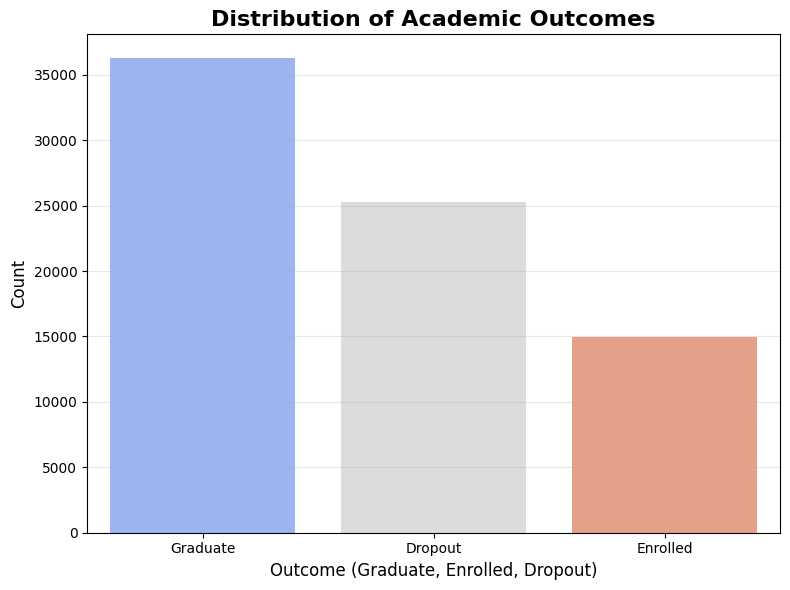

In [6]:
#target distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target', palette='coolwarm')
plt.title('Distribution of Academic Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Outcome (Graduate, Enrolled, Dropout)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

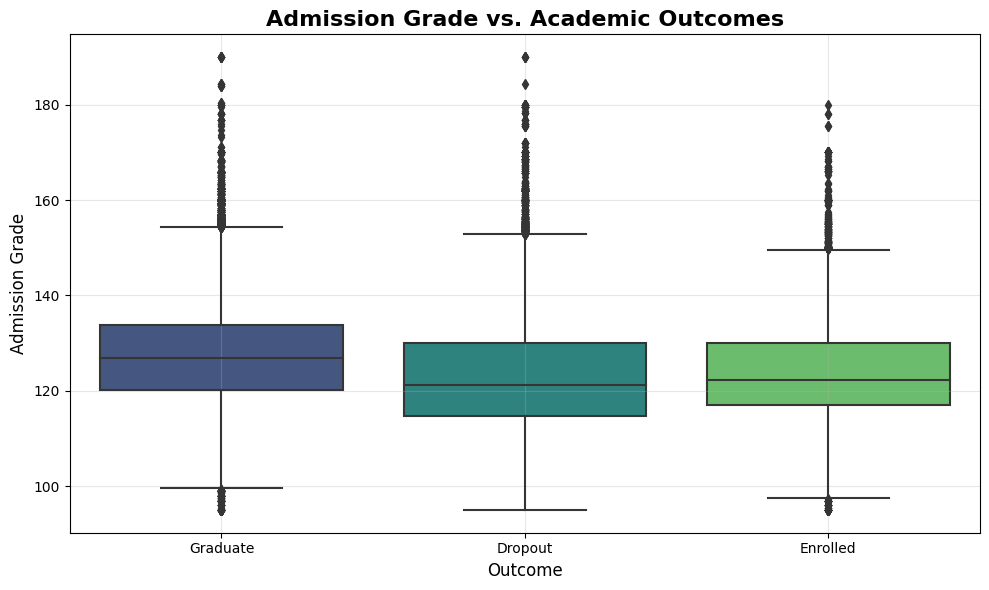

In [7]:
#admission grade by outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Target', y='Admission grade', palette='viridis')
plt.title('Admission Grade vs. Academic Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Admission Grade', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

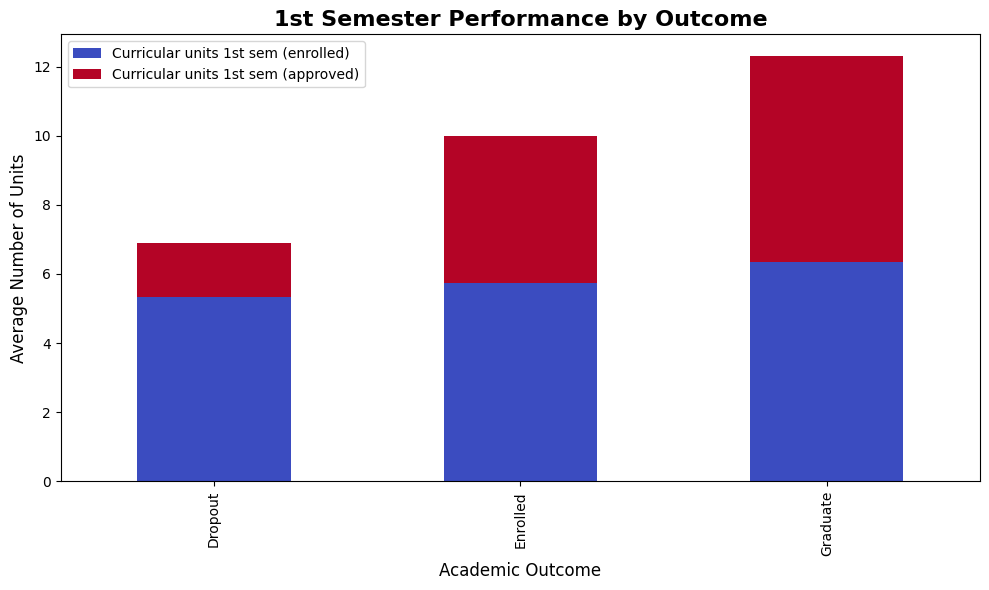

In [8]:
#curricular units approved (1st semester) vs. outcomes
sem1 = ['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)']
outcome_group = df.groupby('Target')[sem1].mean().reset_index()

outcome_group.plot(x='Target', kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('1st Semester Performance by Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Academic Outcome', fontsize=12)
plt.ylabel('Average Number of Units', fontsize=12)
plt.tight_layout()
plt.show()

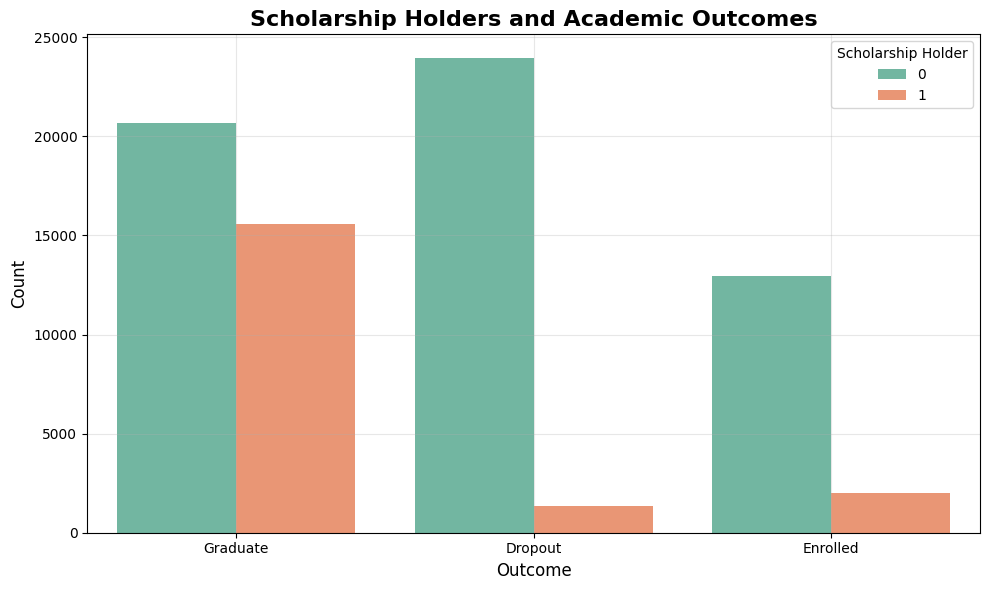

In [9]:
#scholarship status and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Target', hue='Scholarship holder', palette='Set2')
plt.title('Scholarship Holders and Academic Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Scholarship Holder', loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

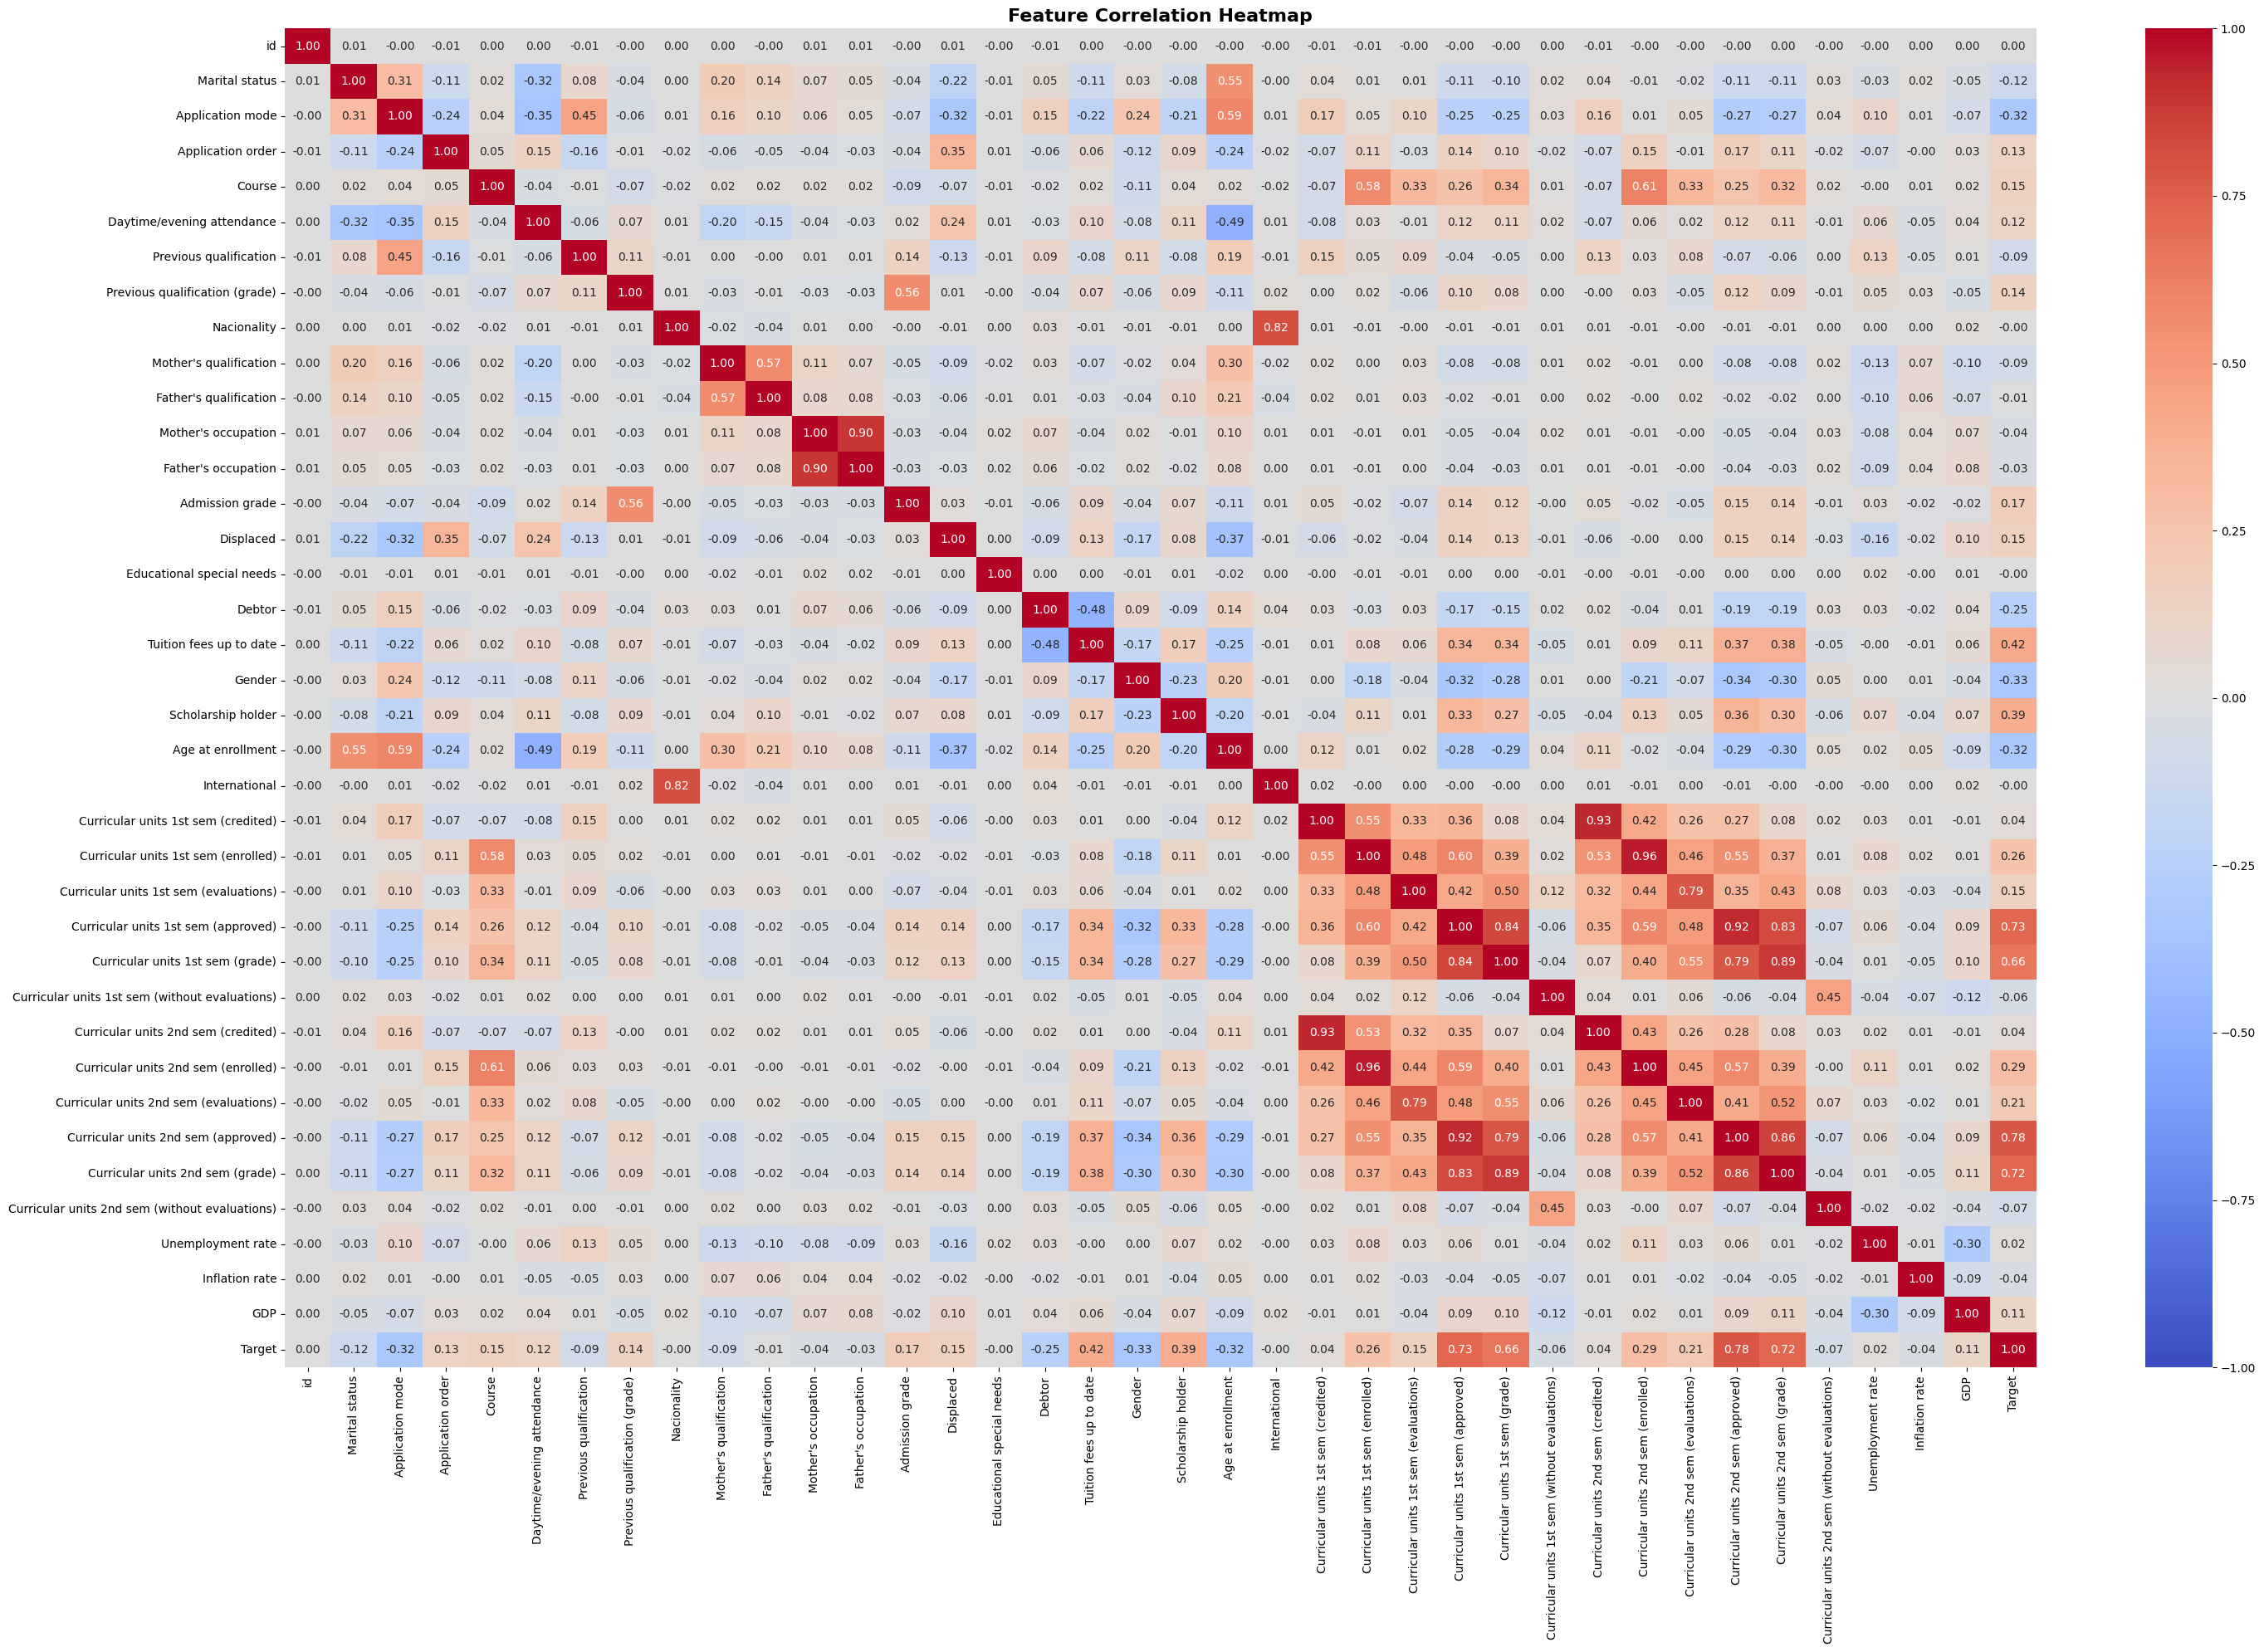

In [10]:
#correlation heatmap
temp_df = df.copy()
temp_df['Target'] = LabelEncoder().fit_transform(temp_df['Target'])
plt.figure(figsize=(30, 20))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Deep Learning Modelling

In [4]:
#preprocessing the training data
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

x = train.drop(columns=['id', 'Target'])
y = train['Target']

#label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=3)

In [5]:
#splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
#scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#defining the input shape
input_shape = x_train_scaled.shape[1]

In [7]:
#building the deep learning classification model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
#callbacks for optimization
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)]

#training the model
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=callbacks, verbose=0)

In [9]:
predictions = model.predict(x_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
#converting one-hot encoded y_test back to class labels for classification report
y_test_classes = np.argmax(y_test, axis=1)

#generating the classification report
report = classification_report(y_test_classes, predicted_classes, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.86      5028
    Enrolled       0.64      0.59      0.62      3017
    Graduate       0.85      0.92      0.88      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.82      0.83      0.82     15304



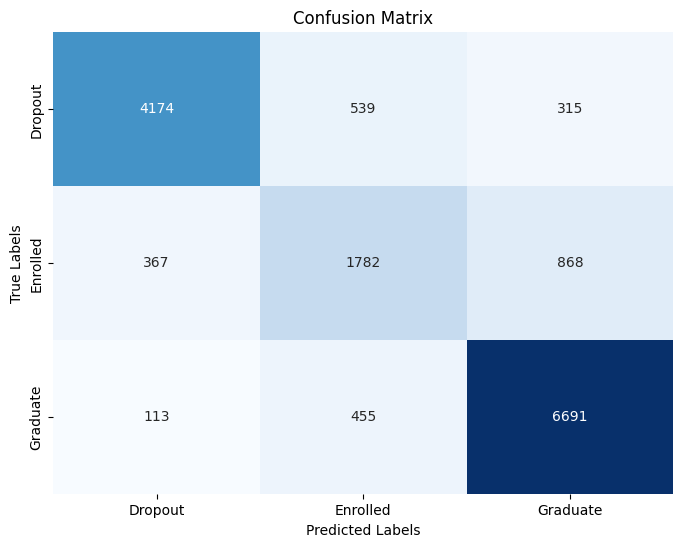

In [11]:
#confusion matrix
cm = confusion_matrix(y_test_classes, predicted_classes)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,051 (183.80 KB)

 Trainable params: 15,555 (60.76 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 31,112 (121.54 KB)

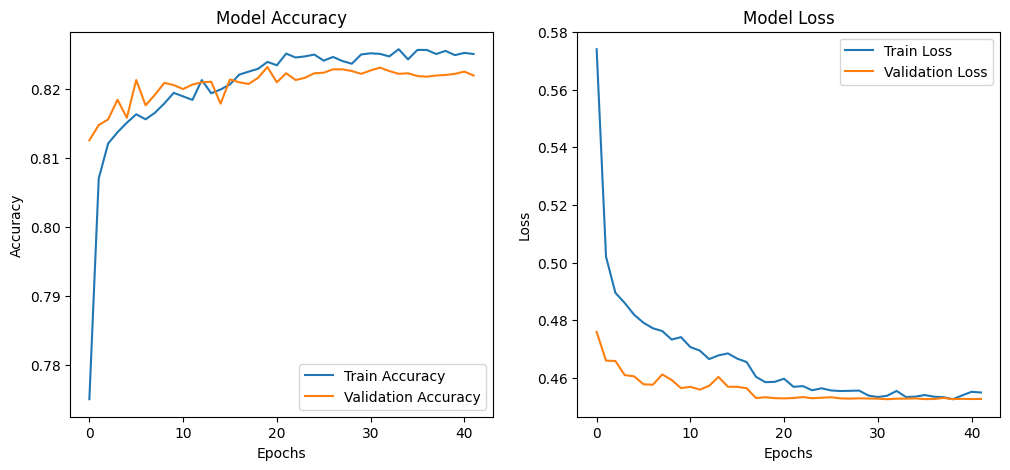

In [13]:
#accuracy and loss graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# 📊 **Results and Evaluation** 🎓

The deep learning classification model achieved strong overall performance in predicting academic outcomes (`dropout`, `enrolled`, `graduate`). Key evaluation metrics are as follows:

- **Accuracy**: The model correctly classified 83% of the student outcomes.

- **Class-Specific Metrics**:
  - **Dropout**: Precision `0.90`, Recall `0.83`, F1-score `0.86`  
    The model exhibits high precision, minimizing false positives for predicting dropouts, and strong recall, effectively identifying most dropout cases.
  - **Enrolled**: Precision `0.64`, Recall `0.59`, F1-score `0.62`  
    Performance is moderate for this class, indicating room for improvement in distinguishing currently enrolled students.
  - **Graduate**: Precision `0.85`, Recall `0.92`, F1-score `0.88`  
    The model demonstrates excellent performance for identifying students who successfully graduate.

- **Macro Average** (unweighted across all classes):  
  Precision `0.80`, Recall `0.78`, F1-score `0.79`  
  This reflects balanced performance across all outcome categories.

- **Weighted Average** (weighted by class support):  
  Precision `0.82`, Recall `0.83`, F1-score `0.82`  
  Indicates consistent, high-quality predictions given the dataset's distribution.

---

- **Enrolled Class Performance**: Precision (`0.64`) and recall (`0.59`) for enrolled students indicate challenges in distinguishing this class from dropouts or graduates. Enhancing feature engineering or addressing class imbalance could improve these metrics.

---

**The results of this project have significant implications in the academic and policy-making domains:**

- Early Intervention for At-Risk Students: By accurately predicting dropouts, educational institutions can proactively identify at-risk students and provide tailored support, such as tutoring programs, mental health counseling, or financial aid.

- Resource Allocation: Insights from the model can help allocate resources effectively. For instance, schools can focus on students with low `Admission Grade` or poor `Curricular Unit Performance`, as these may correlate with higher dropout risks.

- Enhancing Student Support Services: Academic advisors can use predictions to personalize guidance for students, helping them improve their performance and transition from "enrolled" to "graduate."

---